In [13]:
import numpy as np
import random
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%tensorflow_version 2.x
import tensorflow

from google.colab import drive

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import text

from collections import Counter

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [14]:
RANDOM_SEED = 12
# MAX_FEATURES = 50000
# EMBEDDINGS_DIM = 100
# MAX_DOC_LEN_esquerda = 9000

os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)

ROOTDIR = '/content/drive/MyDrive/Pós/discursos/'

from google.colab import drive
drive.mount('/content/drive')

LEGISLATURA = 54
TEST_SIZE = 0.2
ESPECTROS = ('extrema-esquerda', 'esquerda', 'centro-esquerda', 'centro', 'centro-direita', 'direita', 'extrema-direita', 'indefinido')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
discursos = pd.read_json(ROOTDIR + 'data/discursos_dataset.json')

In [16]:
if LEGISLATURA != 'all':
  discursos = discursos.loc[discursos.idLegislatura == LEGISLATURA]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


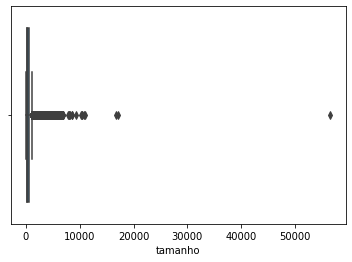

In [17]:
discursos['tamanho'] = discursos.tokens.map(len)
sns.boxplot(discursos.tamanho) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


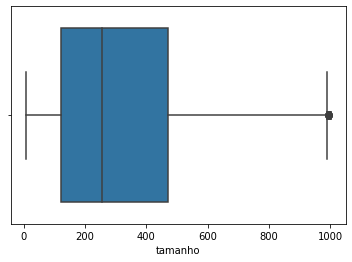

In [18]:
# descartar discursos muito grandes
MAX_TAM = 1000
discursos = discursos.loc[discursos.tamanho <= MAX_TAM]
sns.boxplot(discursos.tamanho)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


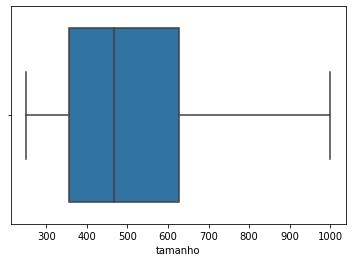

In [19]:
# descartar discursos muito curtos
MIN_TAM = 250
discursos = discursos.loc[discursos.tamanho >= MIN_TAM]
sns.boxplot(discursos.tamanho)

## Ajustando as classes

In [20]:
discursos.espectro.value_counts()

esquerda           5854
centro             2783
centro-direita     1512
direita            1418
centro-esquerda    1069
extrema-direita     535
indefinido           48
Name: espectro, dtype: int64

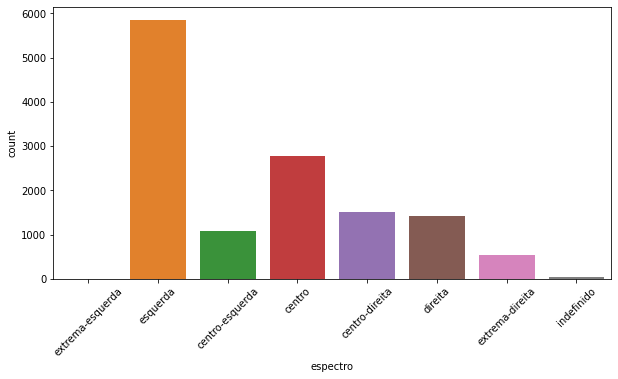

In [21]:
fig = plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(x = 'espectro' , data = discursos, order=ESPECTROS)
plt.show()

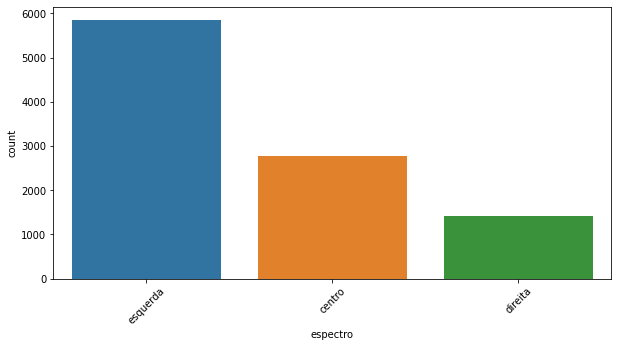

In [22]:
discursos_ = discursos.copy()

discursos_ = discursos_.loc[discursos_.espectro != 'indefinido']
discursos_ = discursos_.loc[discursos_.espectro != 'centro-esquerda']
discursos_ = discursos_.loc[discursos_.espectro != 'centro-direita']
discursos_ = discursos_.loc[discursos_.espectro != 'extrema-direita']
discursos_ = discursos_.loc[discursos_.espectro != 'extrema-esquerda']

ESPECTROS = ('esquerda', 'centro', 'direita')

fig = plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(x = 'espectro' , data = discursos_, order=ESPECTROS)
plt.show()

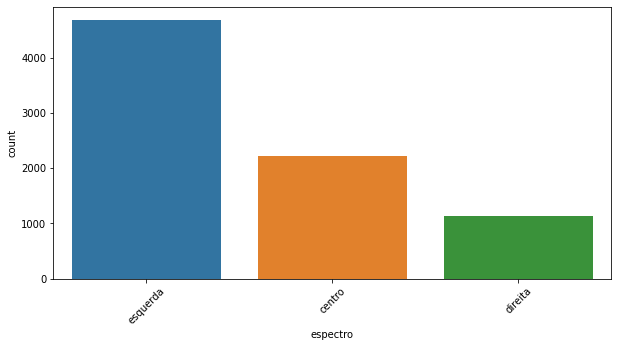

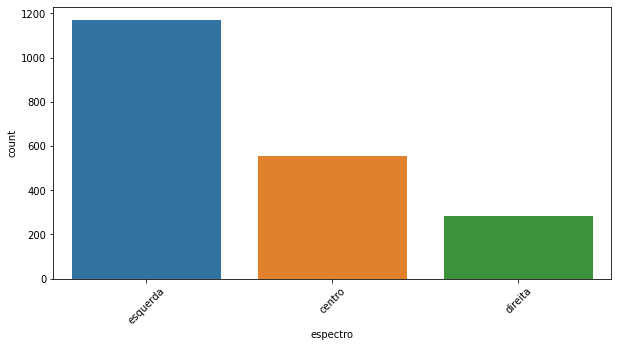

In [23]:
discursos_ = discursos_.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

df_treino, df_teste = train_test_split(discursos_, test_size=TEST_SIZE, random_state=RANDOM_SEED, stratify=discursos_.espectro)

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(x = 'espectro' , data = df_treino, order=ESPECTROS)
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(x = 'espectro' , data = df_teste, order=ESPECTROS)
plt.show()

df_treino.to_json(ROOTDIR + f'data/treino_discurso_{MIN_TAM}_{MAX_TAM}_{LEGISLATURA}.json')
df_teste.to_json(ROOTDIR + f'data/teste_discurso_{MIN_TAM}_{MAX_TAM}_{LEGISLATURA}.json')